DATA OVERVIEW

'id': A unique identifier for each data record.

'customer_id': An identifier for each customer, allowing you to associate multiple records with the same individual.

'month': The month of the data record, indicating when the data was collected or relevant.

'name': The name of the customer, which may be used for identification purposes.

'age': The age of the customer, providing information about their age demographic.

'ssn': The Social Security Number (SSN) of the customer, a unique identifier used for verification.

'occupation': The occupation or profession of the customer, which can help understand their employment status.

'annual_income': The annual income of the customer, a crucial financial parameter.

'monthly_inhand_salary': The monthly salary or income available to the customer after deductions.

'num_bank_accounts': The number of bank accounts held by the customer, indicating their banking activity.

'num_credit_card': The number of credit cards held by the customer, reflecting their credit usage.

'interest_rate': The interest rate associated with the customer's financial products, such as loans or credit cards.

'num_of_loan': The number of loans the customer has, providing insight into their debt obligations.

'type_of_loan': The types of loans the customer holds, which can include mortgages, personal loans, etc.

'delay_from_due_date': The delay in payment from the due date for loans or credit cards, indicating their payment behavior.

'num_of_delayed_payment': The number of delayed payments made by the customer.

'changed_credit_limit': Changes in the customer's credit limit, which can affect their credit utilization.

'num_credit_inquiries': The number of credit inquiries made by the customer, potentially affecting their credit score.

'credit_mix': The composition of the customer's credit accounts, which can impact their credit profile.

'outstanding_debt': The amount of outstanding debt owed by the customer.

'credit_utilization_ratio': The ratio of credit used to the total available credit, a key factor in credit scoring.

'credit_history_age': The age of the customer's credit history, influencing their creditworthiness.

'payment_of_min_amount': How customers handle the minimum payment amount on credit cards or loans.

'total_emi_per_month': The total Equated Monthly Installment (EMI) payments made by the customer.

'amount_invested_monthly': The amount the customer invests on a monthly basis, if applicable.

'payment_behaviour': The behavior of the customer regarding their payments, reflecting their financial responsibility.

'monthly_balance': The monthly balance in the customer's financial accounts.

'credit_score': The target variable representing the customer's credit score, which we aim to predict.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from scipy import stats

In [2]:
train_df= pd.read_csv("C:\\Users\\neo\\Downloads\\archive (4)\\train.csv")
test_df= pd.read_csv("C:\\Users\\neo\\Downloads\\archive (4)\\test.csv")

C:\Users\neo\AppData\Local\Temp\ipykernel_16652\387920034.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df= pd.read_csv("C:\\Users\\neo\\Downloads\\archive (4)\\train.csv")


## Reading the data

In [3]:
#let's merge both test and train dataset 
df= pd.concat([train_df, test_df], ignore_index=True)

In [4]:

pd.set_option('display.max_columns', None)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
df.shape

(150000, 28)

In [6]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  object 
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  object 
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  object 
 13  Type_of_Loan              132888 non-null  o

In [8]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [9]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,127500.000000,150000.000000,150000.000000,150000.000000,150000.000000,147000.000000,150000.000000,150000.000000
mean,4190.115139,17.006940,22.623447,71.234907,21.063400,28.529014,32.283309,1432.513579
std,3180.489657,117.069476,129.143006,461.537193,14.860154,194.456058,5.113315,8403.759977
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.265833,3.000000,4.000000,8.000000,10.000000,3.000000,28.054731,30.947775
50%,3091.000000,6.000000,5.000000,13.000000,18.000000,6.000000,32.297058,71.280006
75%,5948.454596,7.000000,7.000000,20.000000,28.000000,9.000000,36.487954,166.279555
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2597.000000,50.000000,82398.000000


Obsevation : it can be observed that our data set contains outliers, which i will handle further down, also from the table,
columns like Monthly_Inhand_Salary,Num_Credit_Inquiries, contains, missing or null values as thier counts isn't up to the total count, 
of 150,000.

In [10]:
# dropping this colums as they're not meaningful to our target column. 
df.drop(['ID', 'Customer_ID', 'SSN', 'Name'], axis=1, inplace=True)

In [11]:
df.shape

(150000, 24)

Feature Engineering
Handling Categorical features 

In [12]:
df.select_dtypes(include=['object']).head()

,Month,Age,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,_,809.98,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,NaN,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,_,Good,809.98,22 Years and 3 Months,No,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,6.27,Good,809.98,22 Years and 4 Months,No,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,22 Years and 5 Months,No,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


from the looks of our object table, they are columns which are of numerical data types but coming out as object data types,
this could be as a result of special characters or strings embedded within the data of the columns, this should be handled, to correctly specify, 
the column data types.

Month

In [13]:
df['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [14]:
#using label encoding we have
df['Month']=df['Month'].map({'January':1,'February':2,'March':3,'April':4, 'May':5, 'June':6, 'July':7, 'August': 8 ,'September':9, 'October':10, 'November':11, 'December':12})

In [15]:
#checking for missing values in the column
df['Month'].isnull().sum()

0

Occupation

In [16]:
df['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [17]:
# rows containing this characters '_______' will be removed as it counts is higher than any occupation present 
df= df[df['Occupation'].str.contains('_______',)== False]

In [18]:
df['Occupation'].value_counts(dropna=False)

Occupation
Lawyer           9899
Engineer         9562
Architect        9550
Mechanic         9459
Accountant       9404
Scientist        9403
Developer        9381
Media_Manager    9362
Teacher          9318
Entrepreneur     9277
Journalist       9122
Doctor           9114
Manager          8973
Musician         8858
Writer           8818
Name: count, dtype: int64

In [19]:
df = pd.get_dummies(df, prefix='Occupation', columns=['Occupation'], drop_first=True)

In [20]:
df.head(2)

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,1,23,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,2,23,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.94496,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [21]:
columns_to_convert = ['Occupation_Architect', 'Occupation_Developer','Occupation_Doctor','Occupation_Engineer','Occupation_Entrepreneur', 'Occupation_Journalist','Occupation_Lawyer', 'Occupation_Manager','Occupation_Mechanic', 'Occupation_Media_Manager', 'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Writer']

In [22]:
df[columns_to_convert]=df[columns_to_convert].astype(int)

In [23]:
df.head(2)

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,1,23,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,23,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.94496,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Age

This columns datatype isn't supposed to be an object type but due to some string present it is classified as such

In [24]:
df['Age'].unique()



array(['23', '-500', '28', ..., '326', '7910', '5826'], dtype=object)

In [25]:
df['Age']= df['Age'].str.replace('_','')

In [26]:
df['Age']= df['Age'].astype(int)

In [27]:
df.select_dtypes(include=['object']).head(2)

,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,_,809.98,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,NaN,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good


Annual_Income


In [28]:
df['Annual_Income'].unique()

array(['19114.12', '34847.84', '34847.84_', ..., '14937.49_', '71025.4_',
       '22620.79_'], dtype=object)

In [29]:
df['Annual_Income']=df['Annual_Income'].str.replace('_','')

In [30]:
df['Annual_Income'].isnull().sum()

0

In [31]:
df['Annual_Income']=df['Annual_Income'].astype(float)

	Num_of_Loan

In [32]:
df['Num_of_Loan'].unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '1017', '146', '563', '341', '444', '720', '49',
       '737', '1106', '466', '728', '313', '843', '597_', '617', '119',
       '663', '640', '92_', '1019', '501', '1302', '39', '716', '848',
       '931', '1214', '186', '424', '1001', '1110', '1152', '457', '1433',
       '1187', '52', '1480', '1047', '1035', '1347_', '193', '699', '329',
       '1451', '484', '132', '649', '995', '545', '684', '1135', '1094',
       '654', '58', '348', '614', '1363', '323', '1406', '1348', '430',
       '153', '1461', '905', '1312', '1424', '95', '1353', '1228', '819',
       '1006', '795', '359', '1209', '590', '696', '1185_', '1465', '911',
       '1181', '70', '816', '1369', '143', '1416', '455', '55', '1096',
       '1474', '420', '1131', '904', '89', '1259', '527', '1241', '449',
       '418', '23', '238', '638', '138', '235_', '2

In [33]:
df['Num_of_Loan']= df['Num_of_Loan'].str.replace('_','')

In [34]:
df['Num_of_Loan']=df['Num_of_Loan'].astype(int)

Num_of_Delayed_Payment

In [35]:
df['Num_of_Delayed_Payment'].unique()

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '8', '20', '22',
       '13', '13_', '14_', '16', '12_', '18', '19', '23', '21', '24',
       '3318', '3083', '22_', '1338', '4_', '3104', '21_', '25', '10_',
       '183_', '9_', '1106', '834', '19_', '26', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '1_', '16_', '-2', '3478',
       '2420', '15_', '707', '708', '26_', '18_', '3815', '11_', '28',
       '27', '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882',
       '1941', '2628', '132', '3069', '306', '0_', '6_', '3539', '3684',
       '1823', '4128', '1946', '827', '2297', '2566', '904', '182', '929',
       '3568', '2503', '1552', '2812', '1697', '851', '3905', '923', '88',
       '1668', '3253', '808', '2689', '3858', '642', '3457', '1402',
       '1732', '3154', '847', '3037', '2204', '3103', '1063', '2056',
       '1282', '2569_', '211', '793', '3484', '411', '3491', '2072',
   

In [36]:
df['Num_of_Delayed_Payment'].value_counts(dropna=False)

Num_of_Delayed_Payment
NaN     9778
19      7412
17      7265
10      7169
16      7137
        ... 
905        1
4053       1
3869       1
933        1
2034       1
Name: count, Length: 999, dtype: int64

In [37]:
df['Num_of_Delayed_Payment']= df['Num_of_Delayed_Payment'].str.replace('_','')

In [38]:

df['Num_of_Delayed_Payment']= df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median())



In [39]:
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].astype(int)

In [40]:
df.select_dtypes(include=['object']).head(2)

,Type_of_Loan,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",11.27,_,809.98,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,"Auto Loan, Credit-Builder Loan, Personal Loan,...",11.27,Good,809.98,NaN,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good


Changed_Credit_Limit

In [41]:
df['Changed_Credit_Limit'].unique()

array(['11.27', '_', '6.27', ..., '-1.6', '-4.6', '29.17'], dtype=object)

In [42]:
df['Changed_Credit_Limit'].value_counts()

Changed_Credit_Limit
_                      2930
11.5                    187
11.32                   184
8.22                    177
10.06                   166
                       ... 
-0.5699999999999998       1
34.77                     1
30.45                     1
32.370000000000005        1
29.17                     1
Name: count, Length: 4578, dtype: int64

In [43]:
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].replace ('_', pd.NA)

In [44]:
df['Changed_Credit_Limit'].value_counts(dropna=False)

Changed_Credit_Limit
<NA>                   2930
11.5                    187
11.32                   184
8.22                    177
10.06                   166
                       ... 
-0.5699999999999998       1
34.77                     1
30.45                     1
32.370000000000005        1
29.17                     1
Name: count, Length: 4578, dtype: int64

In [45]:
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].median())

In [46]:
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].astype(float)

Credit_Mix

In [47]:
df['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [48]:
df['Credit_Mix']=df['Credit_Mix'].replace('',pd.NA)

In [49]:
df['Credit_Mix']=df['Credit_Mix'].fillna(df['Credit_Mix'].mode()[0])

In [50]:
df['Credit_Mix']=df['Credit_Mix'].map({'Good':1, 'Standard':2, 'Bad': 3})

Outstanding_Debt

In [51]:
df['Outstanding_Debt'].unique()

array(['809.98', '605.03', '1303.01', ..., '559.18_', '3711.23_',
       '732.11_'], dtype=object)

In [52]:

df['Outstanding_Debt']=df['Outstanding_Debt'].str.replace('_', '')

In [53]:
df['Outstanding_Debt'].isnull().sum()

0

In [54]:
df['Outstanding_Debt']=df['Outstanding_Debt'].astype(float)

Payment_of_Min_Amount

In [55]:
df['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [56]:
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    73031
No     49772
NM     16697
Name: count, dtype: int64

In [57]:
#replacing the strange NM value we have 
df['Payment_of_Min_Amount']=df['Payment_of_Min_Amount'].replace('NM', pd.NA)

In [58]:
df['Payment_of_Min_Amount']=df['Payment_of_Min_Amount'].fillna(df['Payment_of_Min_Amount'].mode()[0])

In [59]:
#target encoding
df['Payment_of_Min_Amount']=df['Payment_of_Min_Amount'].map({'Yes':1, 'No':2})

Amount_invested_monthly

In [60]:
df['Amount_invested_monthly'].unique()

array(['80.41529543900253', '118.28022162236736', '81.699521264648', ...,
       '181.44299902757518', '97.59857973344877', '220.45787812168732'],
      dtype=object)

In [61]:
df['Amount_invested_monthly'].isnull().sum()

6276

In [62]:
df['Amount_invested_monthly']=df['Amount_invested_monthly'].str.replace('_','')

In [63]:
df['Amount_invested_monthly']=df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].median())

In [64]:
df['Amount_invested_monthly']=df['Amount_invested_monthly'].astype(float)

Payment_Behaviour

In [65]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [66]:
#replacing strange value 
df['Payment_Behaviour']=df['Payment_Behaviour'].replace('!@9#%8', pd.NA)

In [67]:
df['Payment_Behaviour'].isnull().sum()

10648

In [68]:
df['Payment_Behaviour']=df['Payment_Behaviour'].map({'High_spent_Small_value_payments':1, 'Low_spent_Large_value_payments':2, 'Low_spent_Medium_value_payments':3, 'Low_spent_Small_value_payments':4, 'High_spent_Medium_value_payments':5, 'High_spent_Large_value_payments': 6})

In [69]:
df['Payment_Behaviour']=df['Payment_Behaviour'].fillna(df['Payment_Behaviour'].mode()[0])

Monthly_Balance


In [70]:
df['Monthly_Balance'].unique()

array(['312.49408867943663', '284.62916249607184', '331.2098628537912',
       ..., '349.7263321025098', '463.23898098947717',
       '360.37968260123847'], dtype=object)

In [71]:
df['Monthly_Balance'].isnull().sum()

1649

In [72]:
df['Monthly_Balance']=df['Monthly_Balance'].fillna(df['Monthly_Balance'].mode()[0])

In [73]:
df['Monthly_Balance']=df['Monthly_Balance'].str.replace('_','')

In [74]:
df['Monthly_Balance']=df['Monthly_Balance'].astype(float)

In [75]:
df.select_dtypes(include=['object']).head()

,Type_of_Loan,Credit_History_Age,Credit_Score
0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",22 Years and 1 Months,Good
1,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,Good
2,"Auto Loan, Credit-Builder Loan, Personal Loan,...",22 Years and 3 Months,Good
3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",22 Years and 4 Months,Good
4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",22 Years and 5 Months,Good


Type_of_Loan

In [76]:
df['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

contains different types of loan listed in a single row, this is splitted , so each loan stands alone

In [77]:


df['Type_of_Loan'] = df['Type_of_Loan'].str.replace('and', ',')  # Replace 'and' with commas


In [78]:
df['Type_of_Loan'] = df['Type_of_Loan'].str.split(',')  # Split the string into a list

In [79]:
df = df.explode('Type_of_Loan')

In [80]:
df['Type_of_Loan'] = df['Type_of_Loan'].str.strip(', ') #stripping away the commas 
df.reset_index(drop=True, inplace=True)

In [81]:
df['Type_of_Loan']= df['Type_of_Loan'].fillna(df['Type_of_Loan'].mode()[0])

In [82]:
df['Type_of_Loan']= df['Type_of_Loan'].replace('',pd.NA)

In [83]:
df['Type_of_Loan']= df['Type_of_Loan'].replace('Not Specified',pd.NA)

In [84]:
df.dropna(subset=['Type_of_Loan'], inplace=True)

In [85]:
df['Type_of_Loan'].value_counts(dropna=False)

Type_of_Loan
Payday Loan                56630
Credit-Builder Loan        56529
Home Equity Loan           54560
Mortgage Loan              54394
Student Loan               54269
Personal Loan              54264
Debt Consolidation Loan    54102
Auto Loan                  53053
Name: count, dtype: int64

In [86]:
#encoding this category using one-hot-encoder

df = pd.get_dummies(df, prefix='Type_of_Loan', columns=['Type_of_Loan'], drop_first=True )

In [87]:
df.head(2)

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Type_of_Loan_Credit-Builder Loan,Type_of_Loan_Debt Consolidation Loan,Type_of_Loan_Home Equity Loan,Type_of_Loan_Mortgage Loan,Type_of_Loan_Payday Loan,Type_of_Loan_Personal Loan,Type_of_Loan_Student Loan
0,1,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,NaN,809.98,26.82262,22 Years and 1 Months,2,49.574949,80.415295,1.0,312.494089,Good,0,0,0,0,0,0,0,0,0,0,0,1,0,0,False,False,False,False,False,False,False
1,1,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,NaN,809.98,26.82262,22 Years and 1 Months,2,49.574949,80.415295,1.0,312.494089,Good,0,0,0,0,0,0,0,0,0,0,0,1,0,0,True,False,False,False,False,False,False


In [88]:
columns_to_converti = ['Type_of_Loan_Credit-Builder Loan','Type_of_Loan_Debt Consolidation Loan', 'Type_of_Loan_Home Equity Loan','Type_of_Loan_Mortgage Loan', 'Type_of_Loan_Payday Loan','Type_of_Loan_Personal Loan', 'Type_of_Loan_Student Loan']

In [89]:
df[columns_to_converti]=df[columns_to_converti].astype(int)

Credit_History_Age

In [90]:
df['Credit_History_Age'].unique()

array(['22 Years and 1 Months', nan, '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months',
       '26 Years and 8 Months', '26 Years and 9 Months',
       '26 Years and 10 Months', '26 Years and 11 Months',
       '27 Years and 0 Months', '27 Years and 1 Months',
       '27 Years and 2 Months', '17 Years and 10 Months',
       '18 Years and 2 Months', '18 Years and 3 Months',
       '18 Years and 4 Months', '30 Years and 7 Months',
       '30 Years and 8 Months', '30 Years and 9 Months',
       '30 Years and 10 Months', '30 Years and 11 Months',
       '31 Years and 0 Months', '31 Years and 1 Months',
       '31 Years and 2 Months', '14 Years and 8 Months',
       '14 Years and 9 Months', '15 Years and 0 Months',
       '15 Years and 1 Months', '15 Years and 2 Months',
       '21 Years and 4 Months', '21 Years and 5 Months',
       '21 Years and 6 Months', '21 Years and 7 Months',
       '21 Years and 

In [91]:
df['Credit_History_Age']=df['Credit_History_Age'].fillna(df['Credit_History_Age'].mode()[0])

In [92]:
#splitting Credit_history_age into  year and month
df['Credit_histoty_year'] = df['Credit_History_Age'].str.extract(r'(\d+) Years?')[0].astype(float)
df['Credit_histoty_month'] = df['Credit_History_Age'].str.extract(r'(\d+) Months?')[0].astype(float)


In [93]:
df.drop(['Credit_History_Age'], axis=1, inplace=True)

In [94]:
df.head(2)

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Type_of_Loan_Credit-Builder Loan,Type_of_Loan_Debt Consolidation Loan,Type_of_Loan_Home Equity Loan,Type_of_Loan_Mortgage Loan,Type_of_Loan_Payday Loan,Type_of_Loan_Personal Loan,Type_of_Loan_Student Loan,Credit_histoty_year,Credit_histoty_month
0,1,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,NaN,809.98,26.82262,2,49.574949,80.415295,1.0,312.494089,Good,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,22.0,1.0
1,1,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,NaN,809.98,26.82262,2,49.574949,80.415295,1.0,312.494089,Good,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,22.0,1.0


In [95]:
df.select_dtypes(include=['object']).head(2)

,Credit_Score
0,Good
1,Good


Credit_Score( target column)
this column will be encoded using label encoding 

In [96]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor', nan], dtype=object)

the Nan are the test data, so we do nothing about it

In [97]:
df['Credit_Score']= df['Credit_Score'].map({'Good':3, 'Standard':2 , 'Poor':1 })

Categorical handling of the data is done, the full dataset will be checked one more time to see if there're any null values contained in the numerical columns 

In [98]:
df.head(6)

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Type_of_Loan_Credit-Builder Loan,Type_of_Loan_Debt Consolidation Loan,Type_of_Loan_Home Equity Loan,Type_of_Loan_Mortgage Loan,Type_of_Loan_Payday Loan,Type_of_Loan_Personal Loan,Type_of_Loan_Student Loan,Credit_histoty_year,Credit_histoty_month
0,1,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,NaN,809.98,26.82262,2,49.574949,80.415295,1.0,312.494089,3.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,22.0,1.0
1,1,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,NaN,809.98,26.82262,2,49.574949,80.415295,1.0,312.494089,3.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,22.0,1.0
2,1,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,NaN,809.98,26.82262,2,49.574949,80.415295,1.0,312.494089,3.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,22.0,1.0
4,1,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,NaN,809.98,26.82262,2,49.574949,80.415295,1.0,312.494089,3.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,22.0,1.0
5,2,23,19114.12,NaN,3,4,3,4,-1,14,11.27,4.0,1.0,809.98,31.94496,2,49.574949,118.280222,2.0,284.629162,3.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6.0,7.0
6,2,23,19114.12,NaN,3,4,3,4,-1,14,11.27,4.0,1.0,809.98,31.94496,2,49.574949,118.280222,2.0,284.629162,3.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,6.0,7.0


In [99]:
df.isnull().sum()

Month                                        0
Age                                          0
Annual_Income                                0
Monthly_Inhand_Salary                    65670
Num_Bank_Accounts                            0
Num_Credit_Card                              0
Interest_Rate                                0
Num_of_Loan                                  0
Delay_from_due_date                          0
Num_of_Delayed_Payment                       0
Changed_Credit_Limit                         0
Num_Credit_Inquiries                      8759
Credit_Mix                               87656
Outstanding_Debt                             0
Credit_Utilization_Ratio                     0
Payment_of_Min_Amount                        0
Total_EMI_per_month                          0
Amount_invested_monthly                      0
Payment_Behaviour                            0
Monthly_Balance                           4695
Credit_Score                            145889
Occupation_Ar

In [100]:
df.dropna(subset=['Monthly_Balance', 'Credit_Mix', 'Num_Credit_Inquiries','Monthly_Inhand_Salary'], inplace=True)

In [101]:
df.value_counts()

Month  Age   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  Payment_Behaviour  Monthly_Balance  Credit_Score  Occupation_Architect  Occupation_Developer  Occupation_Doctor  Occupation_Engineer  Occupation_Entrepreneur  Occupation_Journalist  Occupation_Lawyer  Occupation_Manager  Occupation_Mechanic  Occupation_Media_Manager  Occupation_Musician  Occupation_Scientist  Occupation_Teacher  Occupation_Writer  Type_of_Loan_Credit-Builder Loan  Type_of_Loan_Debt Consolidation Loan  Type_of_Loan_Home Equity Loan  Type_of_Loan_Mortgage Loan  Type_of_Loan_Payday Loan  Type_of_Loan_Personal Loan  Type_of_Loan_Student Loan  Credit_histoty_year  Credit_histoty_month
1      41    15931.72       1179.643333            6               

In [102]:
df.shape

(288687, 44)

##Handling Outliers 

In [103]:
df.describe()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Type_of_Loan_Credit-Builder Loan,Type_of_Loan_Debt Consolidation Loan,Type_of_Loan_Home Equity Loan,Type_of_Loan_Mortgage Loan,Type_of_Loan_Payday Loan,Type_of_Loan_Personal Loan,Type_of_Loan_Student Loan,Credit_histoty_year,Credit_histoty_month
count,288687.000000,288687.000000,2.886870e+05,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,2.886870e+05,191348.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000,288687.000000
mean,6.521904,111.430681,1.696633e+05,3627.083930,17.690035,22.896351,76.506067,4.684690,26.254854,32.300672,12.082141,30.760935,2.259329,1942.857704,31.927823,1.201083,1443.050170,592.326191,3.728387,-5.939535e+24,1.721518,0.065680,0.069144,0.068621,0.068531,0.067201,0.063893,0.068694,0.064586,0.069144,0.066023,0.061115,0.068749,0.065819,0.063335,0.128880,0.123636,0.124595,0.125132,0.129289,0.123719,0.124509,13.885371,5.628979
std,3.456942,693.944553,1.427496e+06,2821.639096,117.132779,127.685891,466.527943,63.081229,16.278846,220.337572,7.579253,198.275585,0.730032,1334.374523,5.026217,0.400811,8375.244478,1997.246692,1.468958,4.409732e+25,0.650400,0.247723,0.253699,0.252809,0.252655,0.250370,0.244562,0.252933,0.245793,0.253699,0.248323,0.239541,0.253028,0.247965,0.243565,0.335068,0.329166,0.330260,0.330869,0.335520,0.329261,0.330161,8.125377,3.321070
min,1.000000,-500.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,-6.480000,0.000000,1.000000,0.230000,20.000000,1.000000,4.713184,0.000000,1.000000,-3.333333e+26,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,23.000000,1.747163e+04,1451.606667,5.000000,5.000000,11.000000,3.000000,14.000000,12.000000,6.480000,5.000000,2.000000,865.300000,27.754529,1.000000,53.178709,69.630461,3.000000,2.441065e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,3.000000
50%,7.000000,32.000000,3.408765e+04,2808.200000,7.000000,6.000000,18.000000,5.000000,23.000000,16.000000,10.620000,8.000000,2.000000,1636.230000,31.963017,1.000000,100.731462,128.863020,4.000000,2.937065e+02,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,6.000000
75%,10.000000,40.000000,6.214800e+04,5093.753333,8.000000,8.000000,26.000000,7.000000,37.000000,20.000000,17.460000,11.000000,3.000000,2737.740000,36.139353,1.000000,205.989320,223.624097,5.000000,3.815185e+02,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

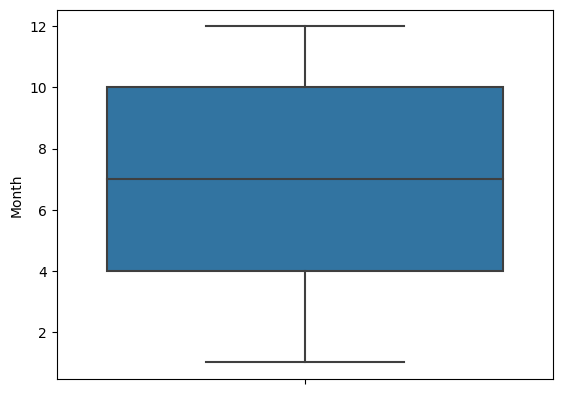

In [104]:
sns.boxplot(data=df, y='Month')
plt.show()

Observation: no outliers contained in the month column

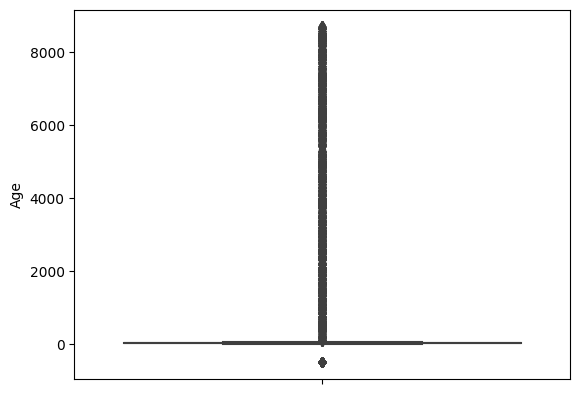

In [105]:
sns.boxplot(data=df, y='Age')
plt.show()

Observation: the age column contains large amounts of outliers as shown by the datapoints above the whisker

In [107]:
df['Age']= df['Age'].replace('-','')

In [108]:
#handling outliers in the Age column
z_scores = stats.zscore(df['Age'])
df = df[(z_scores < 3) & (z_scores > -3)]

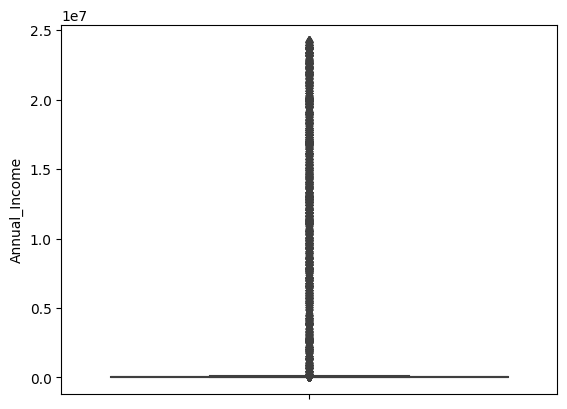

In [109]:
sns.boxplot(data=df, y='Annual_Income')
plt.show()

Observation: the boxplot shows, the annual_income contains outliers 

In [110]:
df['Annual_Income'] = np.log1p(df['Annual_Income'])

In [111]:
df.head(2)

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Type_of_Loan_Credit-Builder Loan,Type_of_Loan_Debt Consolidation Loan,Type_of_Loan_Home Equity Loan,Type_of_Loan_Mortgage Loan,Type_of_Loan_Payday Loan,Type_of_Loan_Personal Loan,Type_of_Loan_Student Loan,Credit_histoty_year,Credit_histoty_month
20,5,23,9.858235,1824.843333,3,4,3,4,6,14,11.27,4.0,1.0,809.98,24.797347,2,49.574949,41.420153,5.0,341.489231,3.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,22.0,5.0
21,5,23,9.858235,1824.843333,3,4,3,4,6,14,11.27,4.0,1.0,809.98,24.797347,2,49.574949,41.420153,5.0,341.489231,3.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,22.0,5.0


<function matplotlib.pyplot.show(close=None, block=None)>

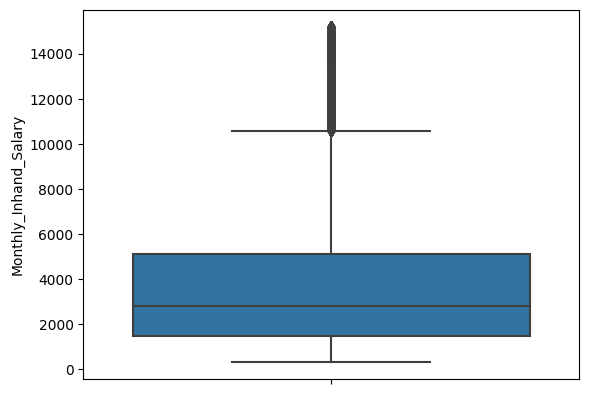

In [112]:
sns.boxplot(data=df, y= 'Monthly_Inhand_Salary')
plt.show

Observation: no much outliers, but it will still be handled

In [113]:
df.loc[:, 'Monthly_Inhand_Salary'] = np.log1p(df['Monthly_Inhand_Salary'])


<function matplotlib.pyplot.show(close=None, block=None)>

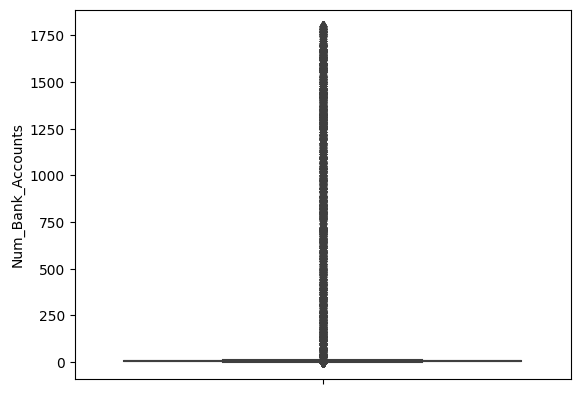

In [114]:
sns.boxplot(data=df, y= 'Num_Bank_Accounts')
plt.show

obsevation: This column contains Outliers 

In [115]:
df.loc[:, 'Num_Bank_Accounts'] = np.log1p(df['Num_Bank_Accounts'])



c:\Users\neo\anaconda3\envs\my_new_env\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [116]:
df.head(2)

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Type_of_Loan_Credit-Builder Loan,Type_of_Loan_Debt Consolidation Loan,Type_of_Loan_Home Equity Loan,Type_of_Loan_Mortgage Loan,Type_of_Loan_Payday Loan,Type_of_Loan_Personal Loan,Type_of_Loan_Student Loan,Credit_histoty_year,Credit_histoty_month
20,5,23,9.858235,7.509797,1.386294,4,3,4,6,14,11.27,4.0,1.0,809.98,24.797347,2,49.574949,41.420153,5.0,341.489231,3.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,22.0,5.0
21,5,23,9.858235,7.509797,1.386294,4,3,4,6,14,11.27,4.0,1.0,809.98,24.797347,2,49.574949,41.420153,5.0,341.489231,3.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,22.0,5.0


<function matplotlib.pyplot.show(close=None, block=None)>

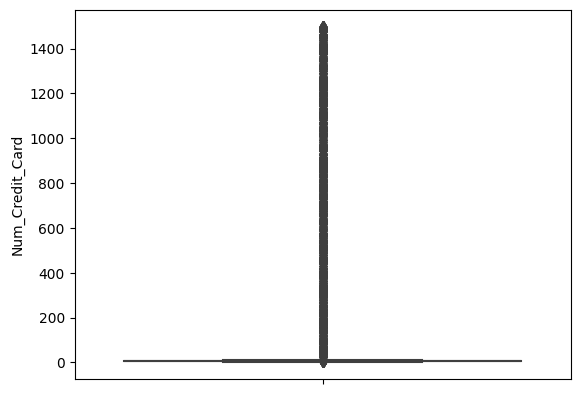

In [117]:
sns.boxplot(data=df, y= 'Num_Credit_Card')
plt.show

In [118]:
z_scores=stats.zscore(df['Num_Credit_Card'])
df=df[(z_scores<3)&(z_scores>-3)]


In [119]:
df.loc[:, 'Num_Credit_Card'] = np.log1p(df['Num_Credit_Card'])


<function matplotlib.pyplot.show(close=None, block=None)>

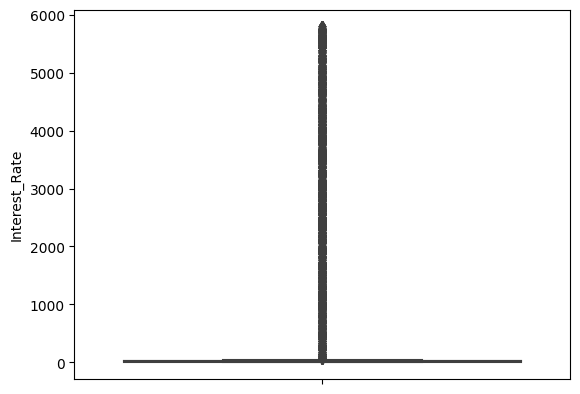

In [120]:
sns.boxplot(data=df, y= 'Interest_Rate')
plt.show

In [121]:
z_scores=stats.zscore(df['Interest_Rate'])
df=df[(z_scores<3)&(z_scores>-3)]


In [122]:
df.loc[:, 'Interest_Rate'] = np.log1p(df['Interest_Rate'])

<function matplotlib.pyplot.show(close=None, block=None)>

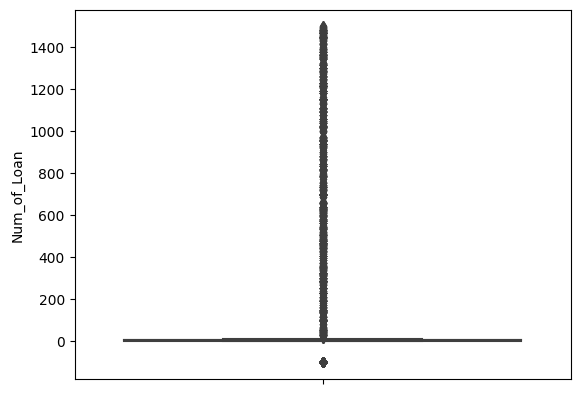

In [123]:
sns.boxplot(data=df, y= 'Num_of_Loan')
plt.show

In [124]:
z_scores=stats.zscore(df['Num_of_Loan'])
df=df[(z_scores<3)&(z_scores>-3)]


In [125]:
df.loc[:, 'Num_of_Loan'] = np.log1p(df['Num_of_Loan'])

c:\Users\neo\anaconda3\envs\my_new_env\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [126]:
df.head(2)

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Type_of_Loan_Credit-Builder Loan,Type_of_Loan_Debt Consolidation Loan,Type_of_Loan_Home Equity Loan,Type_of_Loan_Mortgage Loan,Type_of_Loan_Payday Loan,Type_of_Loan_Personal Loan,Type_of_Loan_Student Loan,Credit_histoty_year,Credit_histoty_month
20,5,23,9.858235,7.509797,1.386294,1.609438,1.386294,1.609438,6,14,11.27,4.0,1.0,809.98,24.797347,2,49.574949,41.420153,5.0,341.489231,3.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,22.0,5.0
21,5,23,9.858235,7.509797,1.386294,1.609438,1.386294,1.609438,6,14,11.27,4.0,1.0,809.98,24.797347,2,49.574949,41.420153,5.0,341.489231,3.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,22.0,5.0


<function matplotlib.pyplot.show(close=None, block=None)>

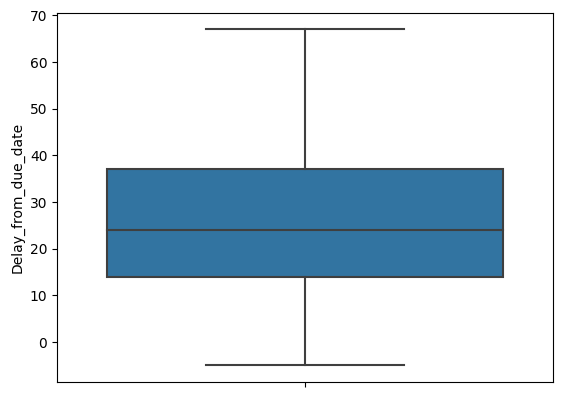

In [127]:
sns.boxplot(data=df, y= 'Delay_from_due_date')
plt.show

observation: no Outliers, as the are no datapoints below or above the whiskers

<function matplotlib.pyplot.show(close=None, block=None)>

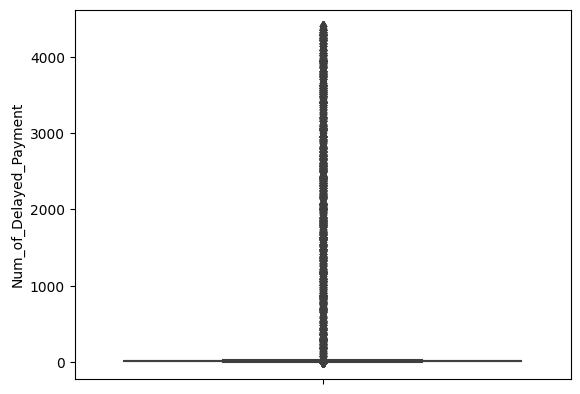

In [128]:
sns.boxplot(data=df, y= 'Num_of_Delayed_Payment')
plt.show

In [129]:
z_scores=stats.zscore(df['Num_of_Delayed_Payment'])
df=df[(z_scores<3)&(z_scores>-3)]

In [130]:
from scipy.stats.mstats import winsorize
df['Num_of_Delayed_Payment']= winsorize(df['Num_of_Delayed_Payment'], limits=[0.01, 0.01])

<function matplotlib.pyplot.show(close=None, block=None)>

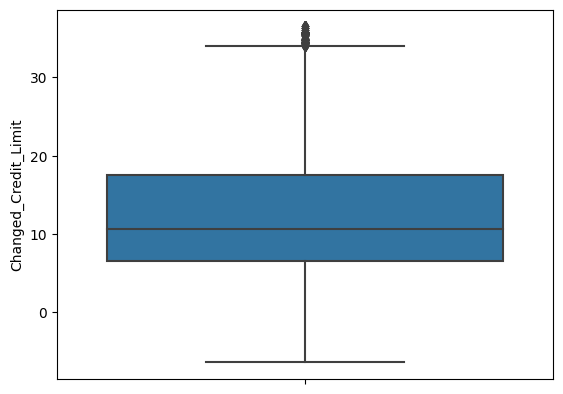

In [131]:
sns.boxplot(data=df, y= 'Changed_Credit_Limit')
plt.show

In [132]:

df['Changed_Credit_Limit']= winsorize(df['Changed_Credit_Limit'], limits=[0.01, 0.01])

<function matplotlib.pyplot.show(close=None, block=None)>

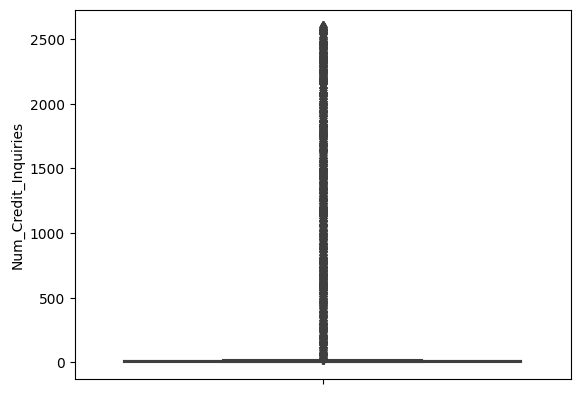

In [133]:
sns.boxplot(data=df, y= 'Num_Credit_Inquiries')
plt.show

In [134]:
z_scores=stats.zscore(df['Num_Credit_Inquiries'])
df=df[(z_scores<3)&(z_scores>-3)]

In [135]:
df['Num_Credit_Inquiries']= winsorize(df['Num_Credit_Inquiries'], limits=[0.01, 0.01])

<function matplotlib.pyplot.show(close=None, block=None)>

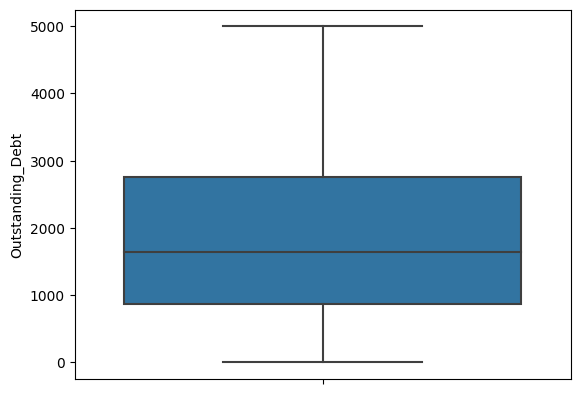

In [136]:
sns.boxplot(data=df, y= 'Outstanding_Debt')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

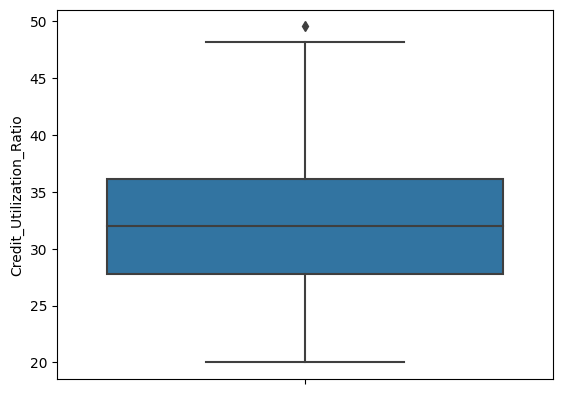

In [137]:
sns.boxplot(data=df, y= 'Credit_Utilization_Ratio')
plt.show

In [138]:
df.head(2)

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Type_of_Loan_Credit-Builder Loan,Type_of_Loan_Debt Consolidation Loan,Type_of_Loan_Home Equity Loan,Type_of_Loan_Mortgage Loan,Type_of_Loan_Payday Loan,Type_of_Loan_Personal Loan,Type_of_Loan_Student Loan,Credit_histoty_year,Credit_histoty_month
20,5,23,9.858235,7.509797,1.386294,1.609438,1.386294,1.609438,6,14,11.27,4.0,1.0,809.98,24.797347,2,49.574949,41.420153,5.0,341.489231,3.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,22.0,5.0
21,5,23,9.858235,7.509797,1.386294,1.609438,1.386294,1.609438,6,14,11.27,4.0,1.0,809.98,24.797347,2,49.574949,41.420153,5.0,341.489231,3.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,22.0,5.0


<function matplotlib.pyplot.show(close=None, block=None)>

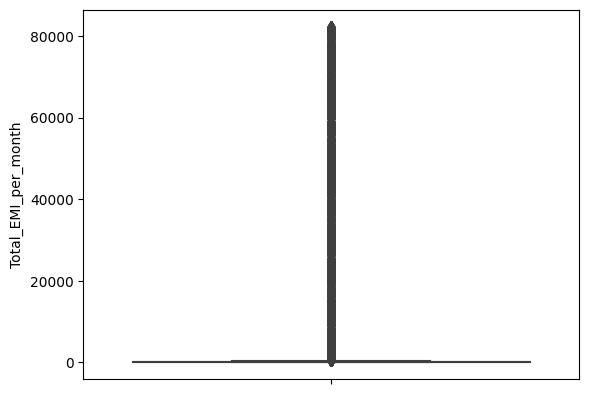

In [139]:
sns.boxplot(data=df, y= 'Total_EMI_per_month')
plt.show

In [140]:
z_scores=stats.zscore(df['Total_EMI_per_month'])
df=df[(z_scores<3)&(z_scores>-3)]

In [141]:
df['Total_EMI_per_month']= winsorize(df['Total_EMI_per_month'], limits=[0.01, 0.01])

<function matplotlib.pyplot.show(close=None, block=None)>

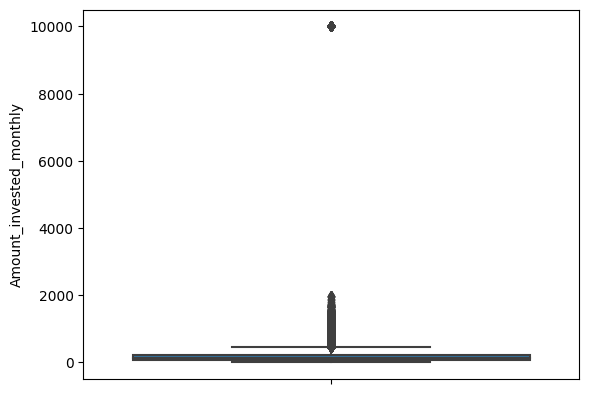

In [142]:
sns.boxplot(data=df, y= 'Amount_invested_monthly')
plt.show

In [143]:
z_scores=stats.zscore(df['Amount_invested_monthly'])
df=df[(z_scores<3)&(z_scores>-3)]

In [144]:
df['Amount_invested_monthly']= winsorize(df['Amount_invested_monthly'], limits=[0.01, 0.01])

<function matplotlib.pyplot.show(close=None, block=None)>

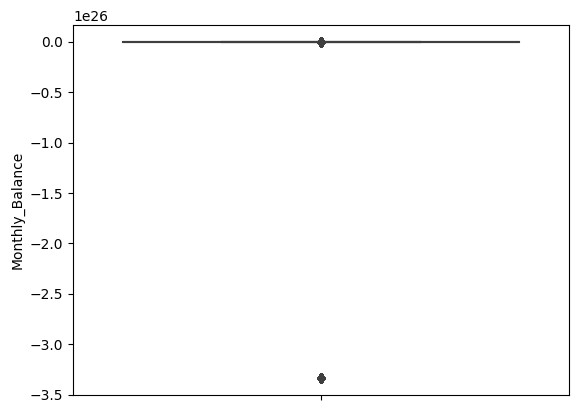

In [145]:
sns.boxplot(data=df, y= 'Monthly_Balance')
plt.show

In [146]:
z_scores=stats.zscore(df['Monthly_Balance'])
df=df[(z_scores<3)&(z_scores>-3)]

In [147]:
df['Monthly_Balance']= winsorize(df['Monthly_Balance'], limits=[0.01, 0.01])

DATA Visualization

In [148]:
#first of, spliting the dataset back into train and test data we have 
df_train= df[df['Credit_Score'].isnull()]
df_test=df[~df['Credit_Score'].isnull()]

In [149]:
df_train.head(2)

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Type_of_Loan_Credit-Builder Loan,Type_of_Loan_Debt Consolidation Loan,Type_of_Loan_Home Equity Loan,Type_of_Loan_Mortgage Loan,Type_of_Loan_Payday Loan,Type_of_Loan_Personal Loan,Type_of_Loan_Student Loan,Credit_histoty_year,Credit_histoty_month
411255,10,24,9.858235,7.509797,1.386294,1.609438,1.386294,1.609438,3,9,13.27,4.0,1.0,809.98,33.053114,2,49.574949,21.46538,5.0,361.444004,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,22.0,10.0
411256,10,24,9.858235,7.509797,1.386294,1.609438,1.386294,1.609438,3,9,13.27,4.0,1.0,809.98,33.053114,2,49.574949,21.46538,5.0,361.444004,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,22.0,10.0


In [150]:
df_train.shape

(83155, 44)